In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf                              #for regression model
from statsmodels.graphics.regressionplots import influence_plot    #for cook's distance

In [2]:
# loading dataset
data = pd.read_csv('Cars.csv')
data      #shape of data(81, 5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [15]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


# Scatter plot between variables along with histograms.

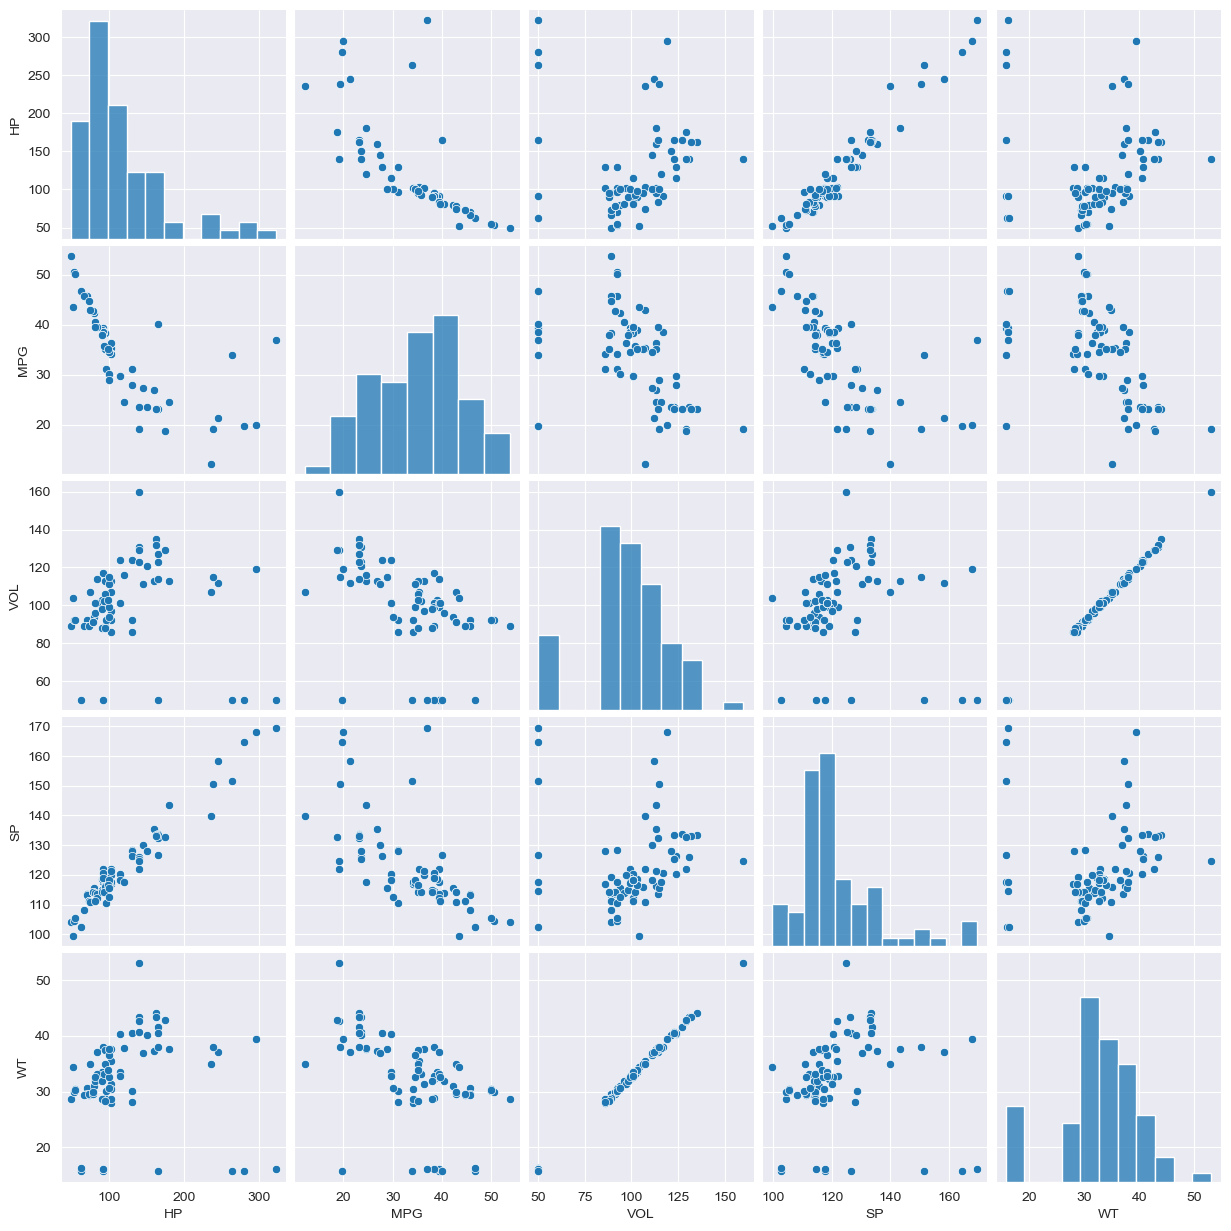

In [6]:
sns.set_style(style = 'darkgrid')
sns.pairplot(data)

Ignoring the graphs above histogram & observe other and make conclusion

# Preparing a model

In [7]:
model = smf.ols('MPG~WT+VOL+SP+HP', data= data).fit()

In [19]:
model.params       #Coefficients

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [9]:
#t and p-values
model.tvalues, model.pvalues

(Intercept    2.058841
 WT           0.236541
 VOL         -0.590970
 SP           2.499880
 HP          -5.238735
 dtype: float64,
 Intercept    0.042936
 WT           0.813649
 VOL          0.556294
 SP           0.014579
 HP           0.000001
 dtype: float64)

In [10]:
#R squared values
model.rsquared, model.rsquared_adj

(np.float64(0.7705372737359842), np.float64(0.7584602881431413))

`rsquared`: Accuracy of model</br>
`rsquared_adj`:
    If we add some variable in the regression equation which not affects any then the value of `rsquared_adj` will descrease & if that variable impacts on MPG then `rsquared_adj` will increase.

# Simple linear regression models
Becoz 'VOL' & 'WT' not much significant. So check for individual & combination

In [11]:
model_vol = smf.ols('MPG~VOL', data=data).fit()
# t values and p values
model_vol.tvalues, model_vol.pvalues

(Intercept    14.106056
 VOL          -5.541400
 dtype: float64,
 Intercept    2.753815e-23
 VOL          3.822819e-07
 dtype: float64)

In [12]:
model_wt = smf.ols('MPG~WT', data=data).fit()
# t values and p values
model_wt.tvalues, model_wt.pvalues

(Intercept    14.248923
 WT           -5.508067
 dtype: float64,
 Intercept    1.550788e-23
 WT           4.383467e-07
 dtype: float64)

In [13]:
model_vol_wt = smf.ols('MPG~VOL+WT', data=data).fit()
# t values and p values
model_vol_wt.tvalues, model_vol_wt.pvalues

(Intercept    12.545736
 VOL          -0.709604
 WT            0.489876
 dtype: float64,
 Intercept    2.141975e-20
 VOL          4.800657e-01
 WT           6.255966e-01
 dtype: float64)

# Calculating VIF --> multi co-linearity

In [16]:
rsquared_hp = smf.ols('HP~WT+VOL+SP',data=data).fit().rsquared
vif_hp = 1/(1-rsquared_hp) #19.926589

rsquared_wt = smf.ols('WT~HP+VOL+SP',data=data).fit().rsquared
vif_wt = 1/(1-rsquared_wt) #638.806084

rsquared_vol = smf.ols('VOL~WT+HP+SP',data=data).fit().rsquared
vif_vol = 1/(1-rsquared_vol) #639.533818

rsquared_sp = smf.ols('SP~WT+VOL+HP',data=data).fit().rsquared
vif_sp = 1/(1-rsquared_sp) #20.007639


#storing vif values in dataframe data_vif
vif = {'Variables':['HP','VOL','WT','SP'], 'VIF': [vif_hp,vif_wt,vif_vol,vif_sp]}
data_vif = pd.DataFrame(vif)
data_vif

,Variables,VIF
0,HP,19.926589
1,VOL,639.533818
2,WT,638.806084
3,SP,20.007639


# Residual analysis

## Test for normality of residual(Q-Q plot)

In [17]:
import statsmodels.api as sm

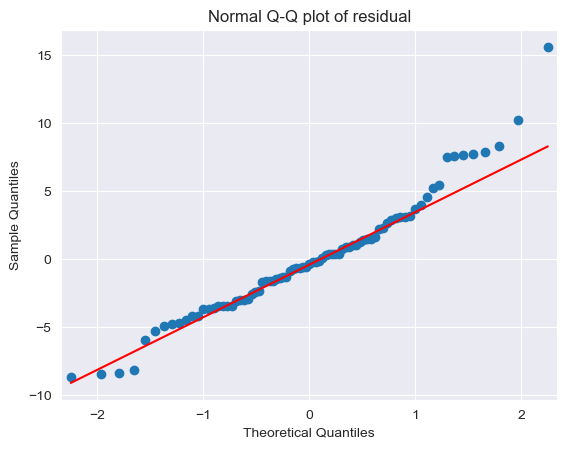

In [23]:
qqplot = sm.qqplot(model.resid, line = 'q') #line = 45 to draw a diagonal line
plt.title('Normal Q-Q plot of residual')
plt.show()

In [27]:
list(np.where(model.resid > 10))

[array([ 0, 76])]

## Residual plot for Homoscedasticity

`ei` Vs `Fitted_value` </br>
Y-axis: `ei` </br>
X-axis: `Fitted_value` </br> 
Homoscedasticity --> error is constant _(some pattern found)_ </br>
Heteroscedasticity --> error is varrying _(randomly distributed)_     ... we can say model is good</br>

In [29]:
def get_standardized_values(vals):
    return (vals - vals.mean())/ vals.std()

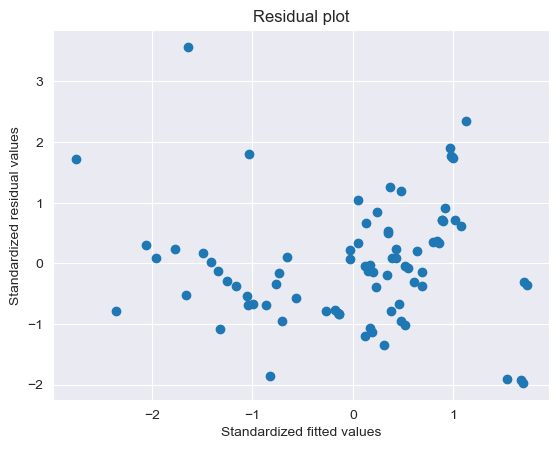

In [30]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual VS regressors

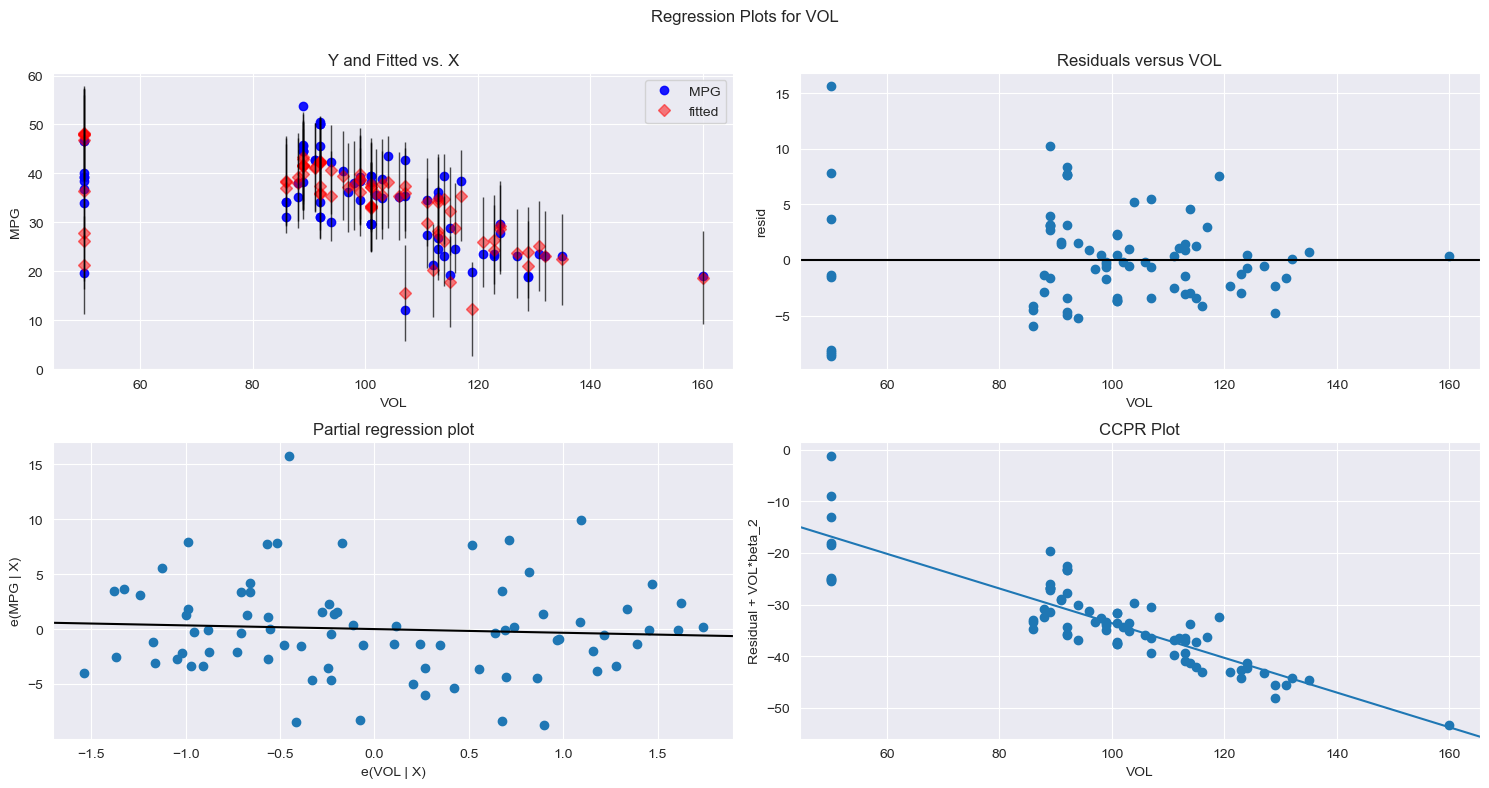

In [31]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig)
plt.show()

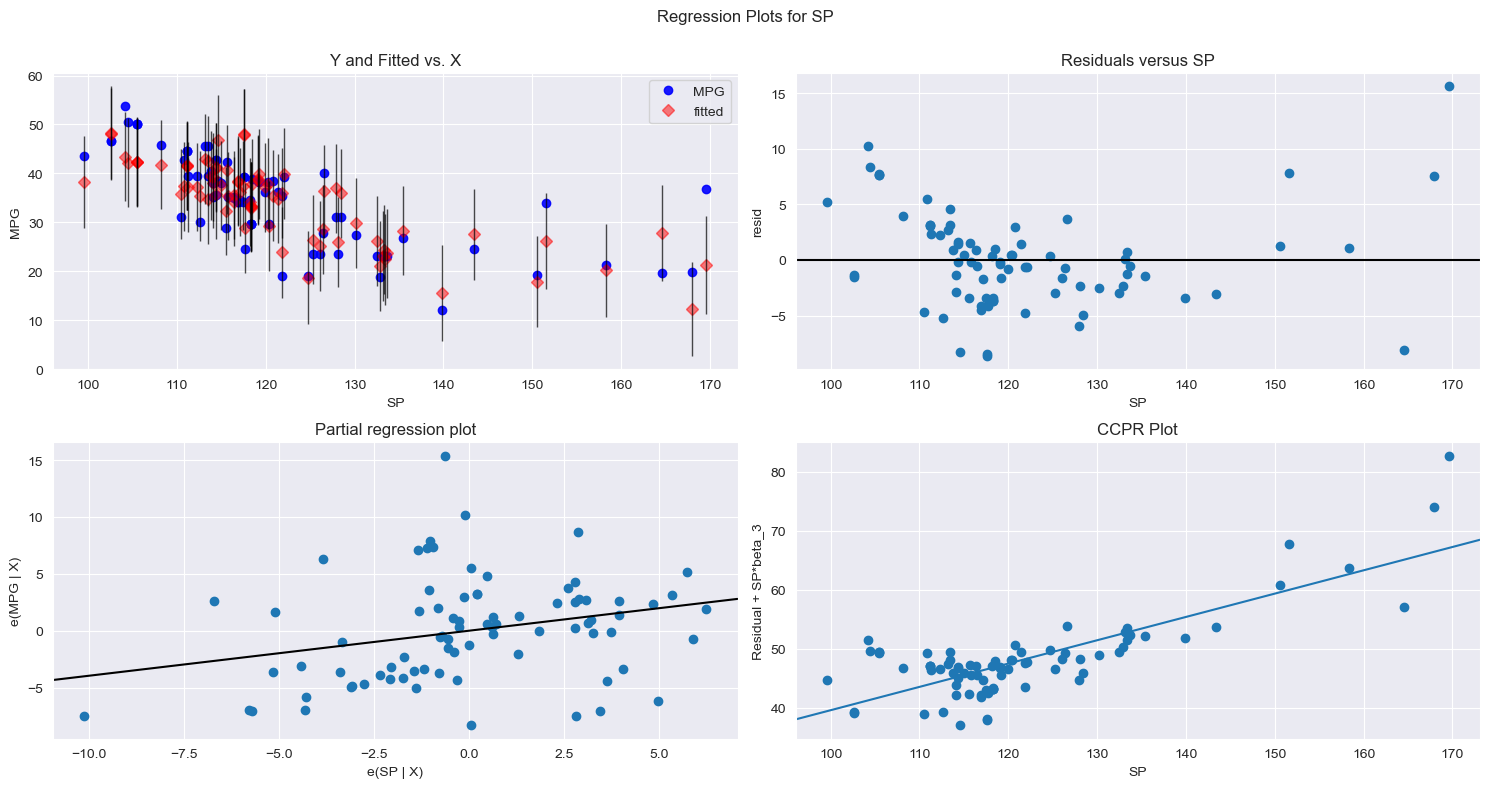

In [32]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig)
plt.show()

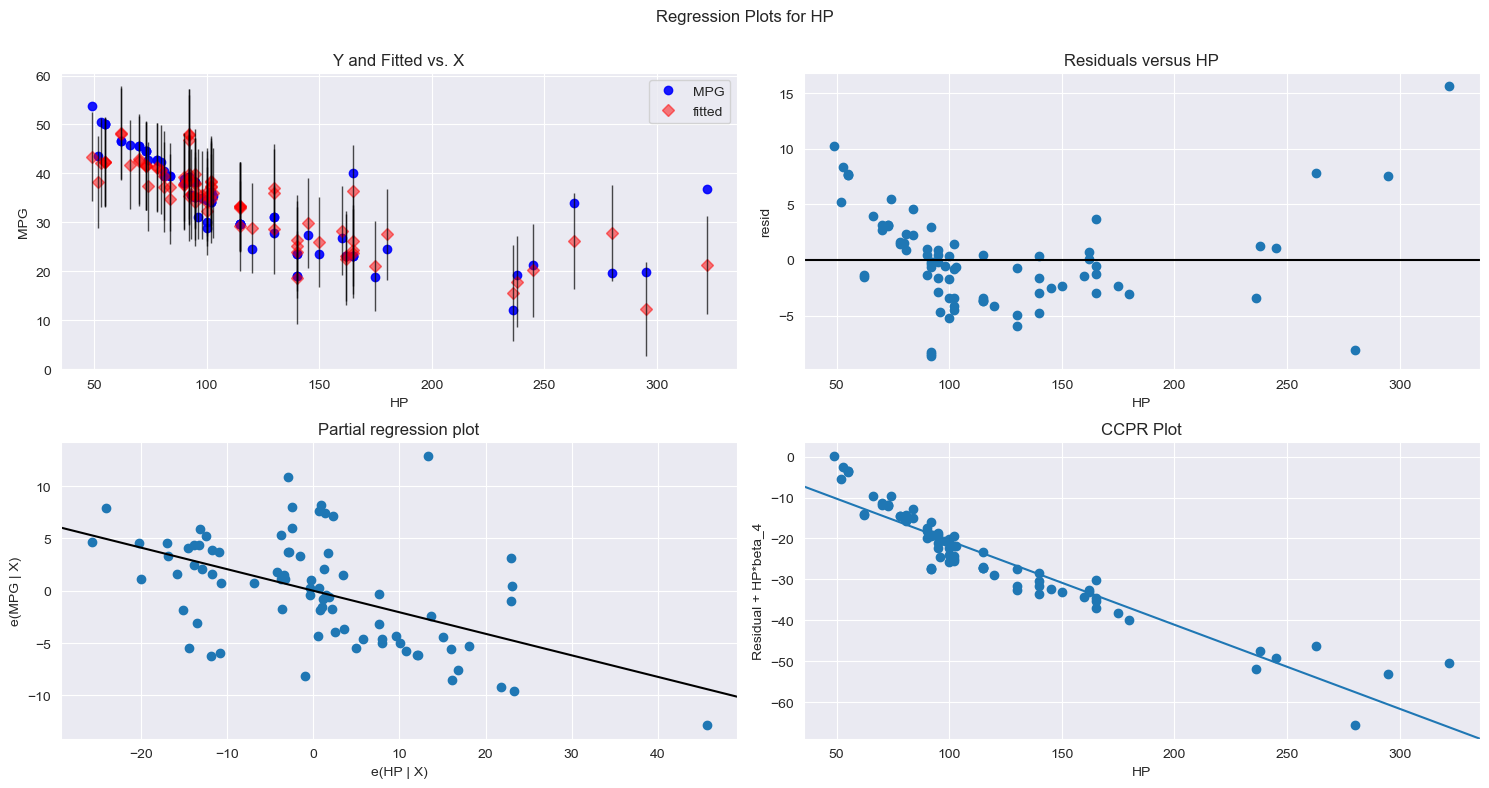

In [33]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig)
plt.show()

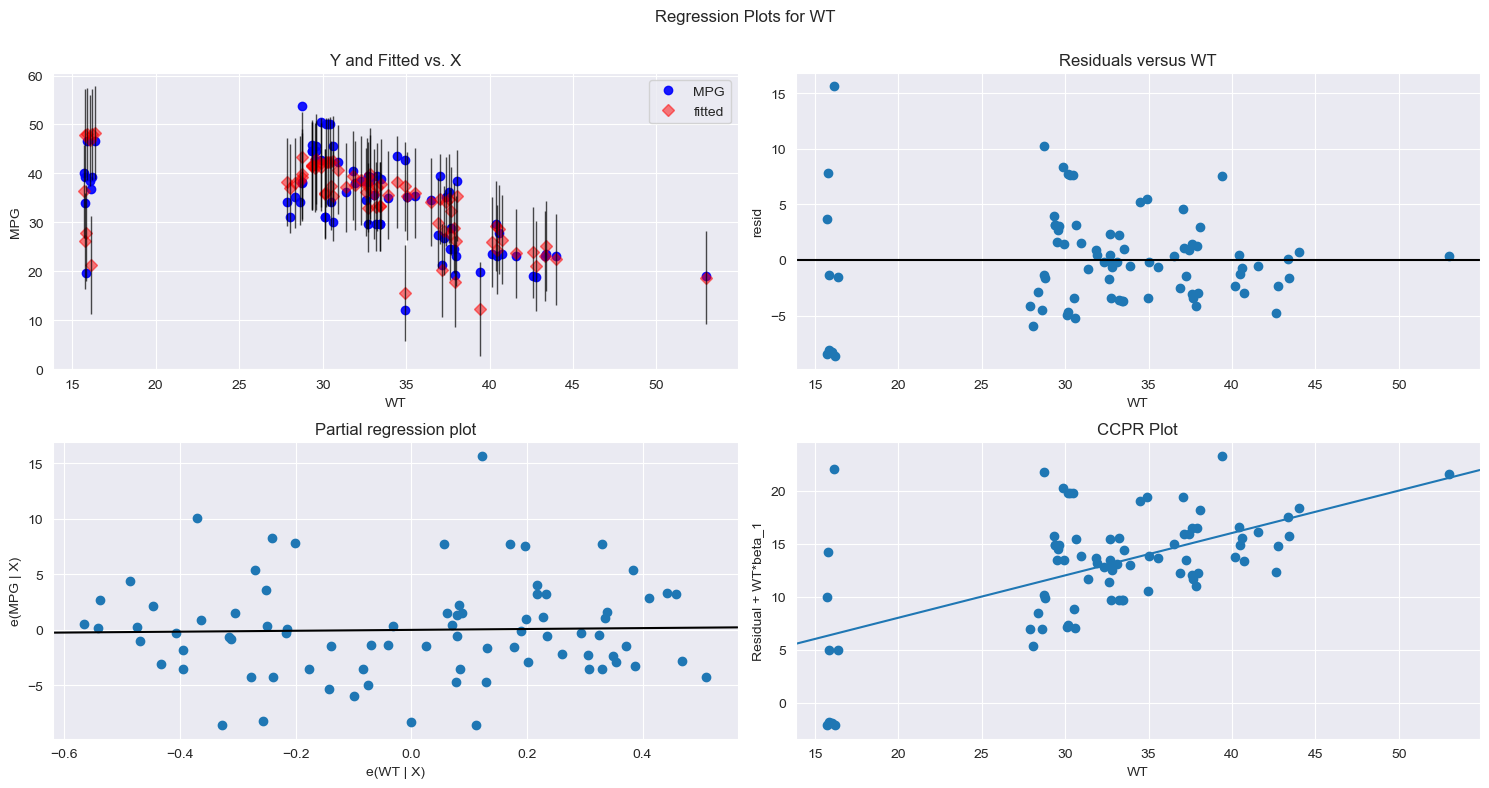

In [34]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig)
plt.show()

# Model deletion diagnostics

Detecting influencers/ outliers

## Cook's distance

In [39]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance   #unused values as '_'

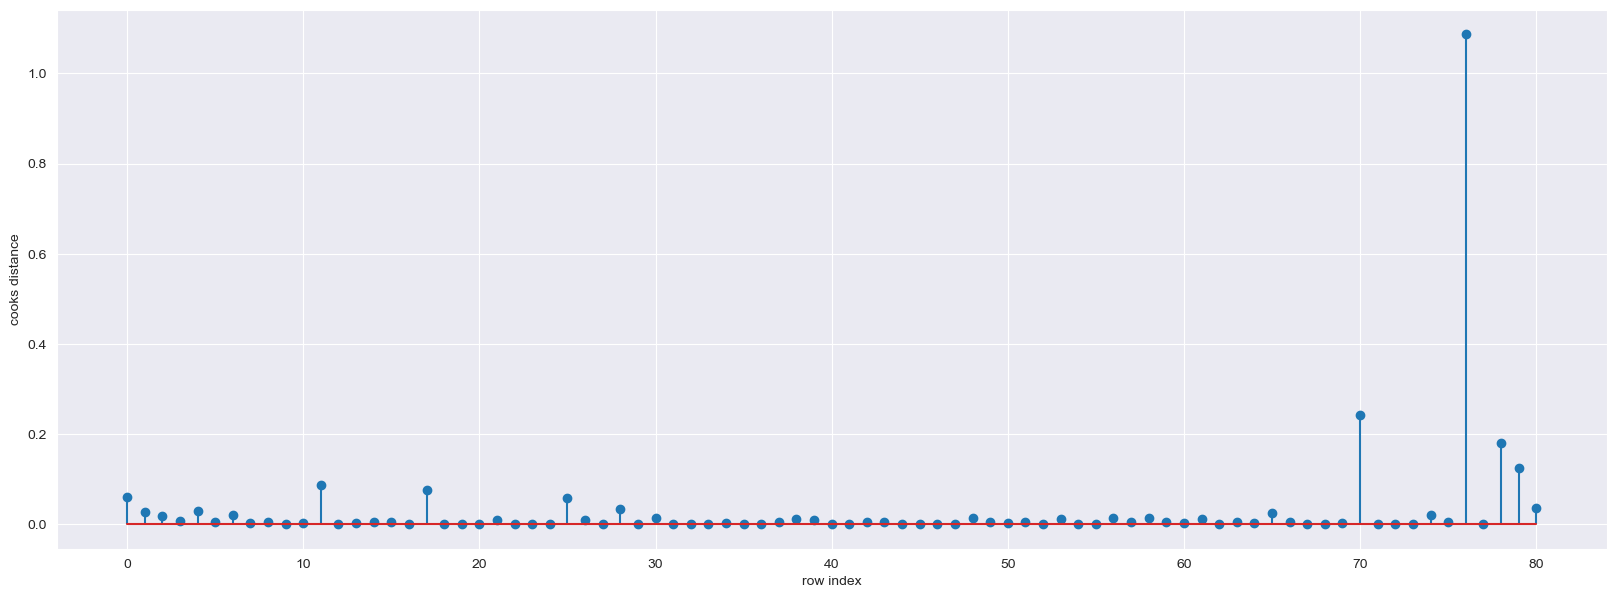

In [47]:
#plot the influenceres using stem plot
fig = plt.figure(figsize = (20, 7))
plt.stem(np.arange(len(data)), np.round(c, 3))
plt.xlabel('row index')
plt.ylabel('cooks distance')
plt.show()

In [52]:
#index and value of influencers where c is more than 0.5
np.argmax(c), np.max(c)

(np.int64(76), np.float64(1.0865193998179927))

## High influence points

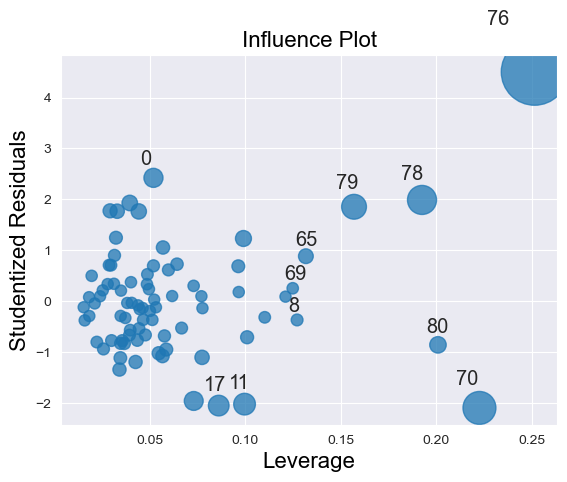

In [53]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [54]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)

In [55]:
leverage_cutoff

0.2222222222222222

**From the above plot, we conclude that data points 70th and 76th are influencers**

In [58]:
data[data.index.isin([70,76])]      #influencers

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [60]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


# Improving the model

In [61]:
#discard the data points which are influencers and reassign the row number
data1 = data.drop(data.index[[70,76]], axis=0).reset_index()

In [63]:
#drop original index
data1 = data1.drop(['index'], axis=1)

In [64]:
data1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


# Build model

In [67]:
#Exclude variable 'WT' and generate r-squared and AIC values
final_ml_V = smf.ols('MPG~VOL+SP+HP', data= data1).fit()

In [68]:
final_ml_V.rsquared, final_ml_V.aic

(np.float64(0.8161692010376007), np.float64(446.11722639447726))

In [71]:
#Exclude variable 'WT' and generate r-squared and AIC values
final_ml_W = smf.ols('MPG~WT+SP+HP', data= data1).fit()

In [72]:
final_ml_W.rsquared, final_ml_W.aic

(np.float64(0.8160034320495304), np.float64(446.18843235750313))

Comparing above rsquared and AIC values, model final_ml_V has high rsquared and low AIC hence include variable 'VOL' so that multi colinearity problem would be resolved

# Cooks's distance

In [74]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

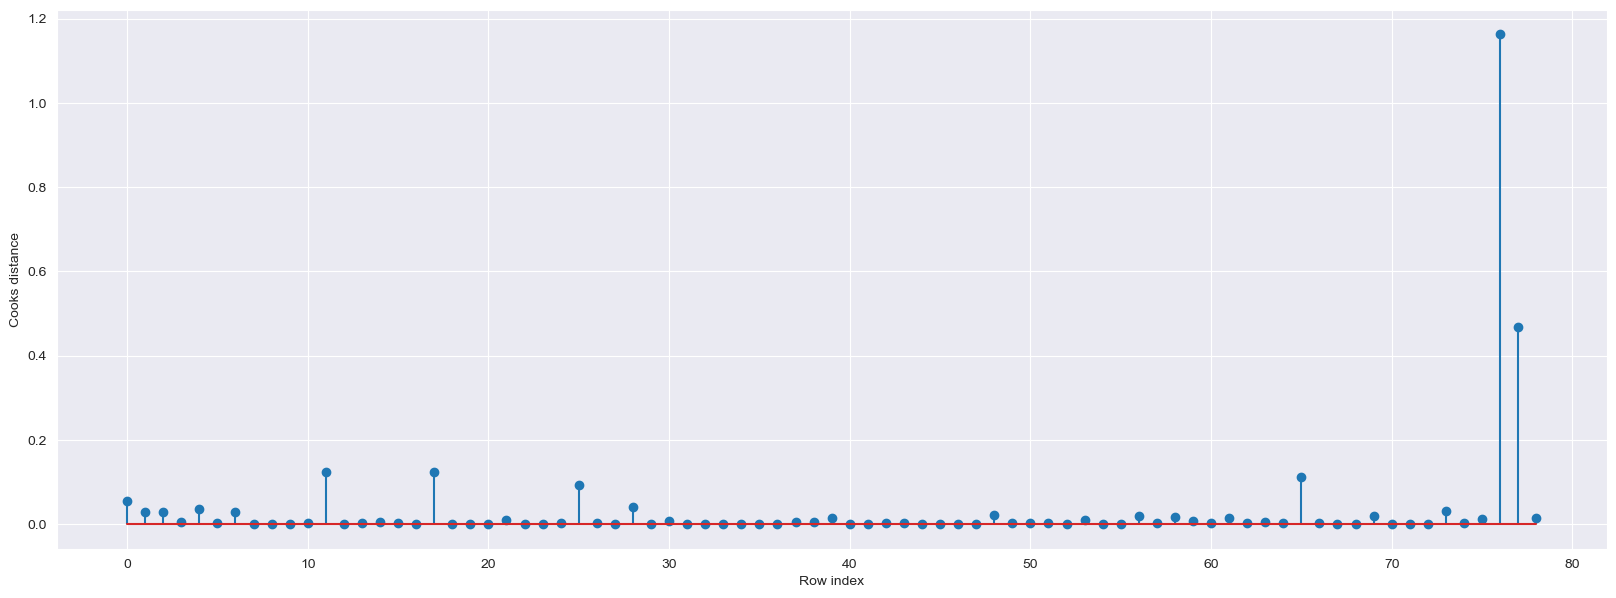

In [75]:
fig = plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)), np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [77]:
#index the data points where c is more than 0.5
np.argmax(c_V), np.max(c_V)

(np.int64(76), np.float64(1.1629387469134964))

In [79]:
#Drop 76th and 77th observation.
data2 = data1.drop(data1.index[[77,76]]).reset_index()
data2 = data2.drop(['index'], axis=1)

In [80]:
data2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [96]:
#build the model on new data
final_ml_V = smf.ols('MPG~VOL+SP+HP', data=data2).fit()

In [97]:
#again check for influencers
model_influence_V = final_ml_V.get_influence()
c_V,_ = model_influence_V.cooks_distance

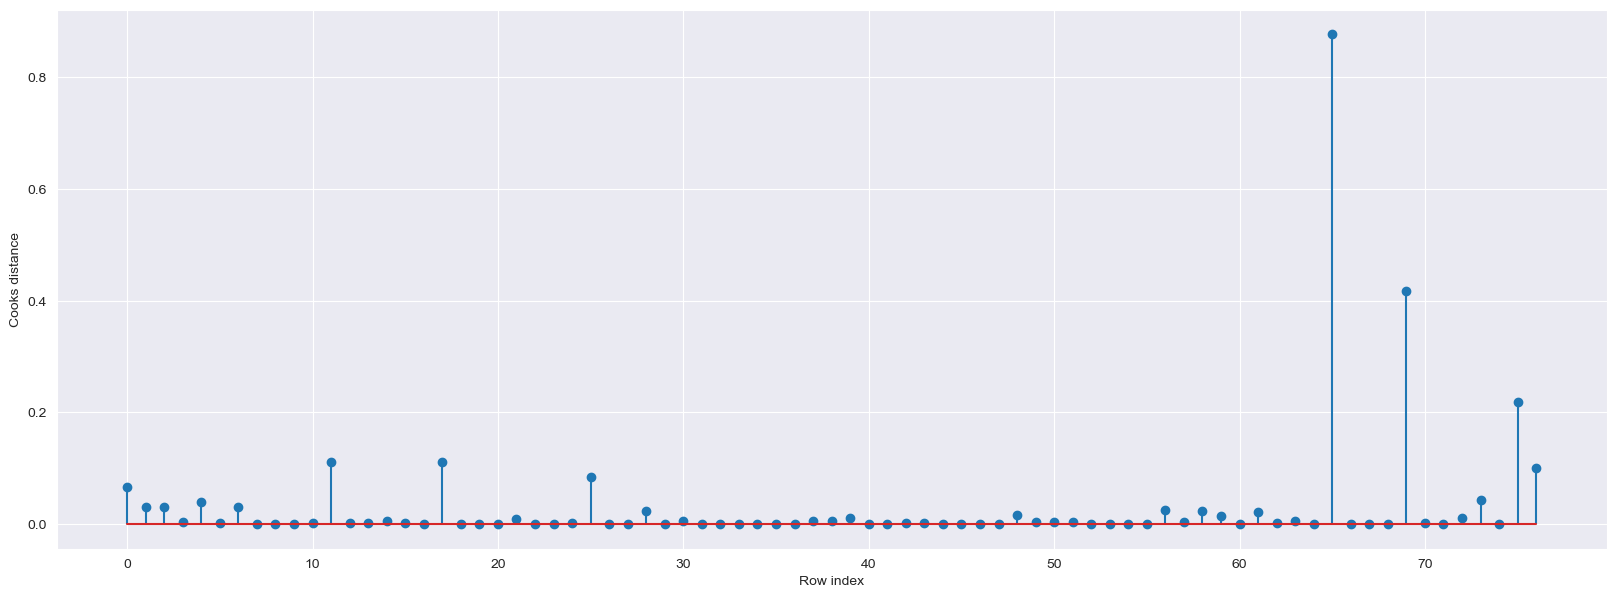

In [98]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c_V,3))
plt.xlabel('Row index')
plt.ylabel('Cooks distance')
plt.show()

In [99]:
#index of the data points where c is more than 0.5 
np.argmax(c_V), np.max(c_V)

(np.int64(65), np.float64(0.8774556986296808))

### Since the value < 1, now we can stop the diagnostics process and finalize model

In [100]:
final_ml_V.rsquared, final_ml_V.aic

(np.float64(0.8669636111859063), np.float64(409.4153062719508))

# Predicting for new data

In [103]:
#new data for prediction
new_data = pd.DataFrame({'HP':40, 'VOL':95, 'SP':102, 'WT': 35}, index=[1])
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [102]:
final_ml_V.predict(new_data)

1    46.035594
dtype: float64